# Introduction to Neural Networks
This document contains practical answers designed to reinforce our understanding of neural networks. Each exercise builds upon the theoretical concepts covered in the lectures, from basic perceptrons to multilayer networks.

## Exercise 1 : Single Neuron Implementation
Implementing a single artificial neuron and understand its components: weights, bias, and activation function.


In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import	matplotlib.pyplot	as	plt
import seaborn as sns
import math

In [3]:
# Set seed for reproducibility
np.random.seed(42)
n_samples = 100

# Generate two classes of points
class1 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_samples // 2, 2))
class2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(n_samples // 2, 2))

# Combine data
X = np.vstack([class1, class2])  # Features
y = np.hstack([np.ones(n_samples // 2), np.zeros(n_samples // 2)])  # Labels


### Neuron Implementation
- Implement weight initialization (in order to reduce the loss)
- Add bias term 
- Implement sigmoid activation function (in order to ensure non linearity)
- Create forward propagation method (prediction based on the past)

In [4]:
class Neuron:
    def __init__(self, n_inputs):
        # Initialize weights and bias randomly
        self.weights = np.random.randn(n_inputs)
        self.bias = np.random.randn()
    
    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        # Forward propagation: computes the neuron's output
        z = np.dot(X, self.weights) + self.bias  # Linear combination
        return self.sigmoid(z)  # Apply activation


### Training Implementation 
- Calculate prediction error (using binary cross-entropy loss)
- Implement gradient descent 
- Update weights and bias (Updates weights to minimize the loss.)
- Track learning progress (monitoring)

In [5]:
class Neuron:
    def __init__(self, n_inputs, learning_rate=0.1):
        # Initialize weights and bias
        self.weights = np.random.randn(n_inputs)
        self.bias = np.random.randn()
        self.lr = learning_rate  # Learning rate controls the step size
    
    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        # Forward pass: Compute predictions
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def train(self, X, y, epochs=1000):
        # Training loop for gradient descent
        m = len(y)  # Number of samples
        loss_history = []  # To store loss at each epoch
        
        for epoch in range(epochs):
            # Forward propagation
            predictions = self.forward(X)
            
            # Compute binary cross-entropy loss
            loss = -np.mean(y * np.log(predictions + 1e-8) + 
                            (1 - y) * np.log(1 - predictions + 1e-8))
            loss_history.append(loss)
            
            # Compute gradients for weights and bias
            dw = np.dot(X.T, (predictions - y)) / m  # Gradient of weights
            db = np.mean(predictions - y)  # Gradient of bias
            
            # Update weights and bias
            self.weights -= self.lr * dw  # Gradient descent step for weights
            self.bias -= self.lr * db  # Gradient descent step for bias
            
            # Print loss every 100 epochs for tracking
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
        
        return loss_history


### Analysis 
- Visualize decision boundary 
Showing how the model separates classes.
- Plot learning curve 
Demonstrating how loss decreases over time.
- Test with different learning rates
Here, we will observe the effect of learning speed.

In [6]:
def plot_decision_boundary(model, X, y):
    # Create a grid of points to classify
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Flatten the grid and get predictions
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
    plt.title("Decision Boundary")
    plt.show()


In [7]:
def plot_learning_curve(loss_history):
    # Plot loss over epochs
    plt.plot(loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.show()



Testing with learning rate: 0.01
Epoch 0: Loss = 0.2309
Epoch 100: Loss = 0.0978
Epoch 200: Loss = 0.0608
Epoch 300: Loss = 0.0440
Epoch 400: Loss = 0.0345
Epoch 500: Loss = 0.0284
Epoch 600: Loss = 0.0241
Epoch 700: Loss = 0.0210
Epoch 800: Loss = 0.0186
Epoch 900: Loss = 0.0167


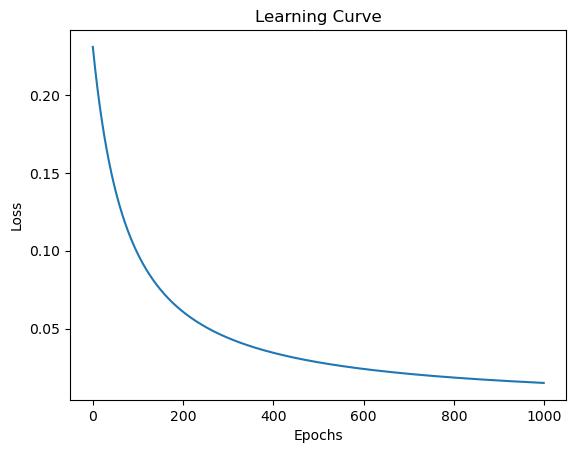

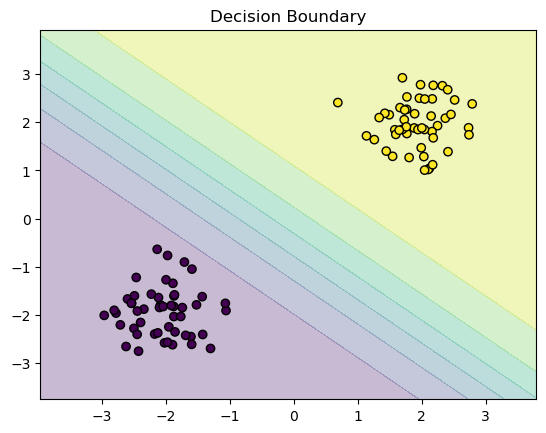


Testing with learning rate: 0.1
Epoch 0: Loss = 1.2047
Epoch 100: Loss = 0.0166
Epoch 200: Loss = 0.0082
Epoch 300: Loss = 0.0055
Epoch 400: Loss = 0.0041
Epoch 500: Loss = 0.0033
Epoch 600: Loss = 0.0028
Epoch 700: Loss = 0.0024
Epoch 800: Loss = 0.0021
Epoch 900: Loss = 0.0019


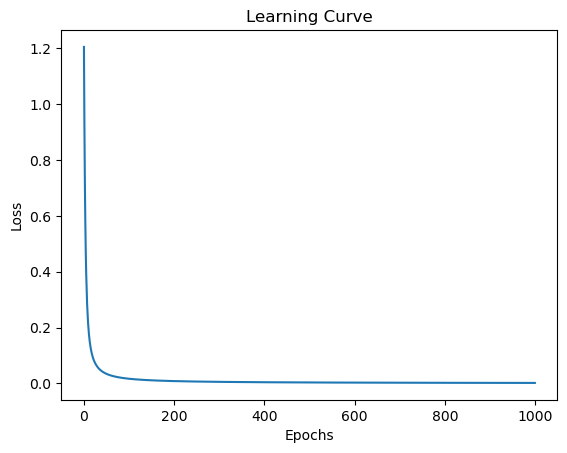

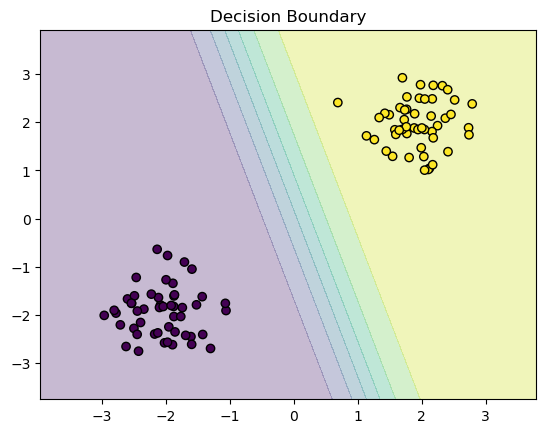


Testing with learning rate: 0.5
Epoch 0: Loss = 0.1430
Epoch 100: Loss = 0.0033
Epoch 200: Loss = 0.0017
Epoch 300: Loss = 0.0012
Epoch 400: Loss = 0.0009
Epoch 500: Loss = 0.0007
Epoch 600: Loss = 0.0006
Epoch 700: Loss = 0.0005
Epoch 800: Loss = 0.0005
Epoch 900: Loss = 0.0004


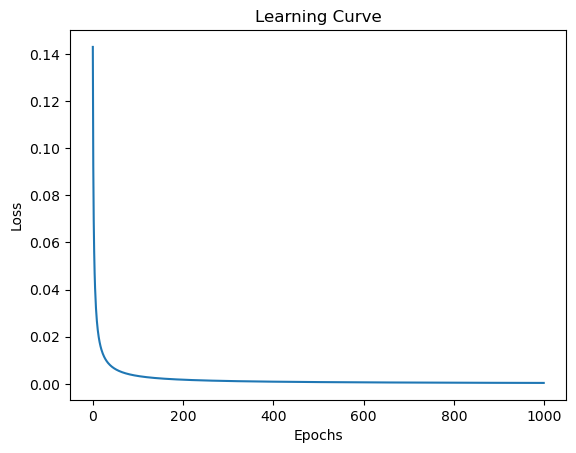

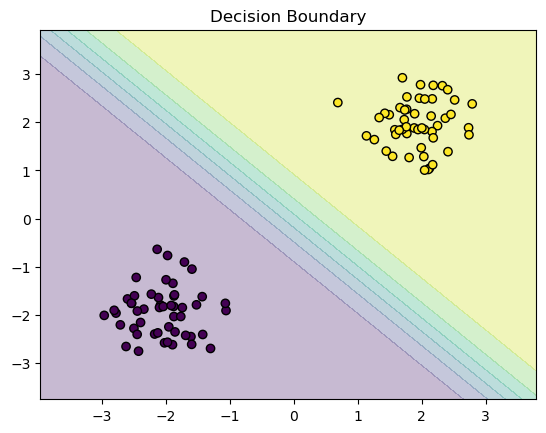


Testing with learning rate: 1.0
Epoch 0: Loss = 0.0009
Epoch 100: Loss = 0.0006
Epoch 200: Loss = 0.0004
Epoch 300: Loss = 0.0004
Epoch 400: Loss = 0.0003
Epoch 500: Loss = 0.0003
Epoch 600: Loss = 0.0002
Epoch 700: Loss = 0.0002
Epoch 800: Loss = 0.0002
Epoch 900: Loss = 0.0002


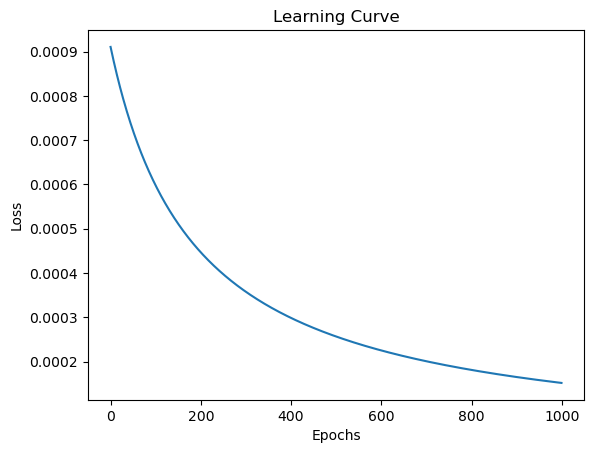

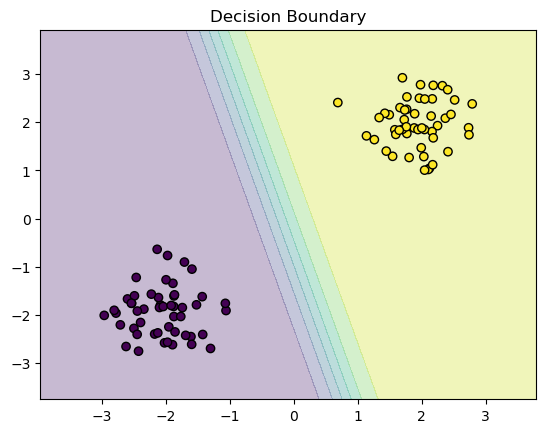

In [8]:
# Define different learning rates to test
learning_rates = [0.01, 0.1, 0.5, 1.0]

for lr in learning_rates:
    print(f"\nTesting with learning rate: {lr}")
    neuron = Neuron(n_inputs=2, learning_rate=lr)
    loss_history = neuron.train(X, y, epochs=1000)
    
    # Plot learning curve and decision boundary
    plot_learning_curve(loss_history)
    plot_decision_boundary(neuron, X, y)


### Interpretation
The loss function decreases with epochs, which means that the model is learning progressively.

Through learning rates, we'll look for the one that rapidly reduces error without causing instability.

- ➡️ Learning Rate = 0.01 (low learning rate)
Start: Loss = 0.2309 (relatively low at start)
End (Epoch 900): Loss = 0.0167
Learning is slow, but stable. After 900 epochs, the error remains relatively higher than for other learning rates.

- ➡️ Learning Rate = 0.1 (Moderate)
Start: Loss = 1.2047 (Very high)
End (Epoch 900): Loss = 0.0019
Loss decreases much faster than for 0.01. Learning is fast and remains stable. It's a good balance between speed and stability.

- ➡️ Learning Rate = 0.5 (High learning rate)
Start: Loss = 0.1430 (Low at start)
End (Epoch 900): Loss = 0.0004
The model quickly achieves a very low error. However, such a high rate can sometimes lead to instability (oscillations). Here, the drive seems to converge well, but this is not always guaranteed.

- ➡️ Learning Rate = 1.0 (Very high learning rate)
Start: Loss = 0.0009 (Already very low at start)
End (Epoch 900): Loss = 0.0002
Learning is extremely fast. On the other hand, such a high rate could lead to divergence (loss explosion) in other contexts. Here, it probably works because the problem is simple or the weights well initialized.

__CCL__ : According to the graphs and the evolution of learning rates, we will use 0.1 as learning rate because it is both stable and speed. The others are slow or too risky.

## Exercise 2: Multilayer Perceptron
Building a complete multilayer perceptron for solving the XOR problem. The XOR (Exclusive OR) problem is a classic machine learning problem, used to demonstrate the importance of multi-layer neural networks. It is non-linear and cannot be solved with a simple linear model.

### Network Architecture 
- Implement multiple layer structure 
- Initialize weights for all layers 
- Add bias to each layer 
- Implement ReLU activation for hidden layer

In [9]:
X_mp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # features 
y_mp = np.array([[0], [1], [1], [0]])              # output waited (XOR)

In [10]:
# Network parameters
input_size = 2       # Two input features
hidden_size = 4      # Four hidden neurons
output_size = 1      # One output neuron
learning_rate = 0.1  # Initial learning rate
epochs = 1000        # Number of training iterations

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size) * 0.1  # Input to hidden
b1 = np.zeros((1, hidden_size))                      # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size) * 0.1 # Hidden to output
b2 = np.zeros((1, output_size))                      # Bias for output layer

print("✅ Weights and biases initialized.")

✅ Weights and biases initialized.


### Forward Propagation
- Calculate layer outputs 
- Implement activation functions 
- Store intermediate values 
- Calculate final output

In [11]:
# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)


In [12]:
# Forward Propagation
def forward_propagation(X):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1  # Linear step
    A1 = relu(Z1)            # Activation step
    
    # Output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)          # Final output
    
    return Z1, A1, Z2, A2


### Backpropagation
- Calculate output error 
- Implement chain rule 
- Update all weights 
- Implement learning rate scheduling

In [13]:
# Backpropagation
def backpropagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2, learning_rate
    
    # Output layer error
    output_error = A2 - y  # Difference between prediction and truth
    d_output = output_error * sigmoid_derivative(A2)
    
    # Hidden layer error
    hidden_error = np.dot(d_output, W2.T) * relu_derivative(A1)
    
    # Update weights and biases
    W2 -= learning_rate * np.dot(A1.T, d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    
    W1 -= learning_rate * np.dot(X.T, hidden_error)
    b1 -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)
    
    # Compute loss (MSE)
    loss = np.mean(output_error ** 2)
    return loss


In [14]:
# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_propagation(X_mp)
    
    # Backward pass and weight update
    loss = backpropagation(X_mp, y_mp, Z1, A1, Z2, A2)
    losses.append(loss)
    
    # Learning rate scheduling (optional)
    if (epoch + 1) % 250 == 0:
        learning_rate *= 0.9  # Decrease by 10%
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss:.4f}")

print("✅ Training completed.")


Epoch 100: Loss = 0.2492
Epoch 200: Loss = 0.2457
Epoch 300: Loss = 0.2351
Epoch 400: Loss = 0.2130
Epoch 500: Loss = 0.1895
Epoch 600: Loss = 0.1775
Epoch 700: Loss = 0.1723
Epoch 800: Loss = 0.1702
Epoch 900: Loss = 0.1692
Epoch 1000: Loss = 0.1685
✅ Training completed.


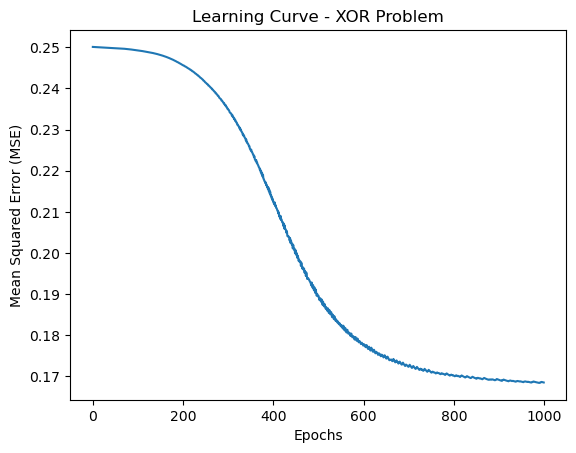

In [15]:
plt.plot(losses)
plt.title('Learning Curve - XOR Problem')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


### Interpretation:
- Loss Decrease:
The loss is steadily decreasing from 0.2492 at Epoch 100 to 0.1685 at Epoch 1000. This shows that the model is making progress in reducing the prediction error.

- Model Behavior:
The model is learning to approximate the XOR logic function. As you can see from the decreasing loss, the model is getting better at predicting the XOR output.

- Learning Rate Scheduling:
If you have applied learning rate scheduling, you may have noticed that the learning rate gradually decreased, which often helps prevent overshooting and allows the model to converge more smoothly.



In [16]:
# Final predictions
Z1, A1, Z2, A2 = forward_propagation(X_mp)
predictions = (A2 > 0.5).astype(int)  # Convert the sigmoid output to binary predictions

print(f"Predictions:\n{predictions}")



Predictions:
[[1]
 [1]
 [1]
 [0]]


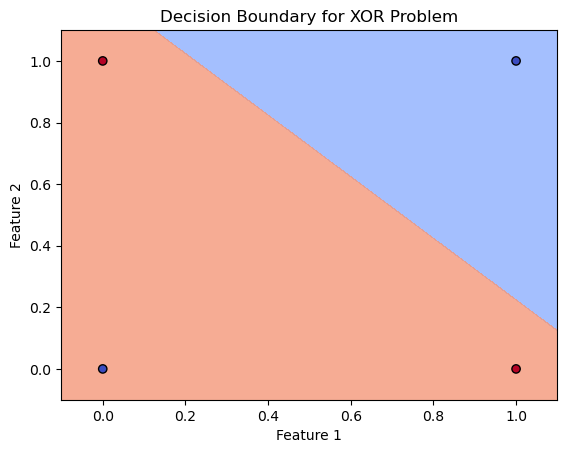

In [17]:
# Decision boundary visualization
# Create a grid of points to evaluate the decision boundary
x_min, x_max = X_mp[:, 0].min() - 0.1, X_mp[:, 0].max() + 0.1
y_min, y_max = X_mp[:, 1].min() - 0.1, X_mp[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for the grid points
_, _, _, grid_preds = forward_propagation(grid_points)
grid_preds = (grid_preds > 0.5).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, grid_preds, alpha=0.8, cmap='coolwarm')
plt.scatter(X_mp[:, 0], X_mp[:, 1], c=y_mp.flatten(), edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary for XOR Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Exercise 3 : Deep Neural Network
Implementing a deep neural network for MNIST digit classification

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the MNIST-like digits dataset
digits = load_digits()

# Define features (X) and target labels (y)
X_d, y_d = digits.data, digits.target

# Normalize the feature values (pixels) to be between 0 and 1
X_d = X_d / 16.0  # Since pixel values range from 0 to 16


### Implementation
- Create multiple hidden layers 
- Implement dropout regularization 
- Add batch normalization 
- Implement mini-batch training

In [19]:

# Define neural network parameters
input_size = 64                 # 64 pixels for each digit (8x8 image)
hidden_size1 = 128              # First hidden layer with 128 neurons
hidden_size2 = 64               # Second hidden layer with 64 neurons
output_size = 10                # 10 output neurons (digits 0-9)

# Hyperparameters
dropout_rate = 0.5              # Drop 50% of neurons during training
batch_size = 32                 # Mini-batch size
epsilon = 1e-5                  # Small value for numerical stability in batch norm


In [20]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

# One hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
y_d = encoder.fit_transform(y_d.reshape(-1, 1))

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_d, y_d, test_size=0.2, random_state=42)
# Define the model
model = Sequential()

# Add layers
model.add(Dense(hidden_size1, input_dim=input_size, activation='relu'))
model.add(Dropout(dropout_rate))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(hidden_size2, activation='relu'))
model.add(Dropout(dropout_rate))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(output_size, activation='softmax'))  # Softmax for multi-class classification


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training 
- Implement cross-entropy loss (Cross-entropy loss measures the difference between predictions and true values.)
- Add momentum to optimization 
- Implement early stopping (in order to stop training if the loss of validation data no longer decreases after several consecutive epochs.)
- Add learning rate decay (Reduce learning rate over time to refine weights)

In [21]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define learning rate decay function
def lr_decay(epoch, initial_lr=0.001, decay_rate=0.96, decay_step=10):
    return initial_lr * (decay_rate ** (epoch // decay_step))

# Use SGD optimizer with momentum
optimizer = SGD(learning_rate=0.001, momentum=0.9)


# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate decay callback
lr_scheduler = LearningRateScheduler(lr_decay)

# Train the model with mini-batch training (batch_size=32)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, lr_scheduler])

# Model summary to see the architecture
model.summary()


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1470 - loss: 2.7567 - val_accuracy: 0.3639 - val_loss: 2.0183 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3717 - loss: 1.8515 - val_accuracy: 0.5556 - val_loss: 1.6992 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5193 - loss: 1.4206 - val_accuracy: 0.7472 - val_loss: 1.3999 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6201 - loss: 1.2082 - val_accuracy: 0.8556 - val_loss: 1.1153 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6411 - loss: 1.0913 - val_accuracy: 0.9056 - val_loss: 0.9073 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7077 - loss: 0.8989 - val_accuracy: 0.9444 - val_loss: 0.6987 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7543 - loss: 0.8149 - val_accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,216 (207.88 KB)

 Trainable params: 17,610 (68.79 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 35,222 (137.59 KB)

### Evaluation 
- Calculate accuracy metrics 
- Create confusion matrix 
- Visualize misclassified digits 
- Analyze network predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy: 97.78%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.95      1.00      0.98        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



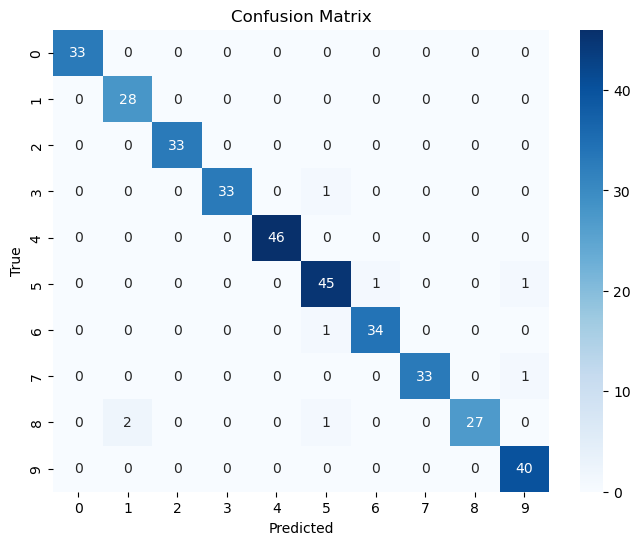

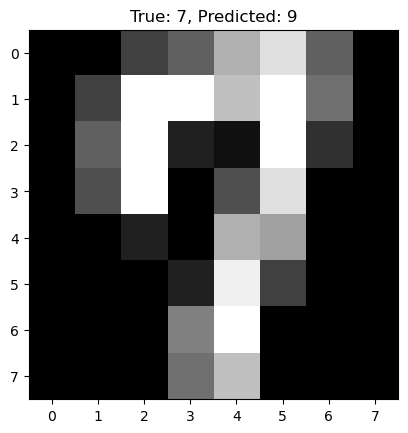

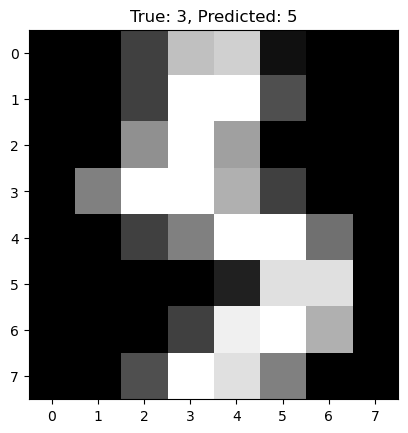

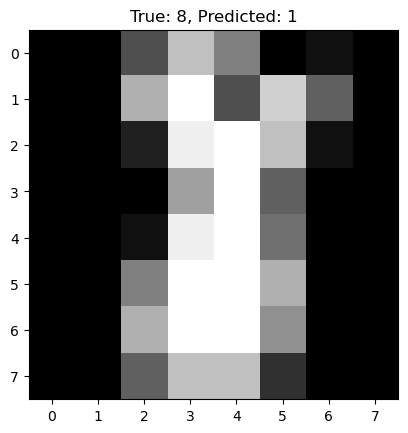

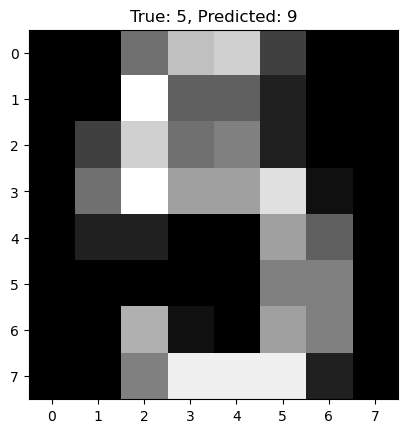

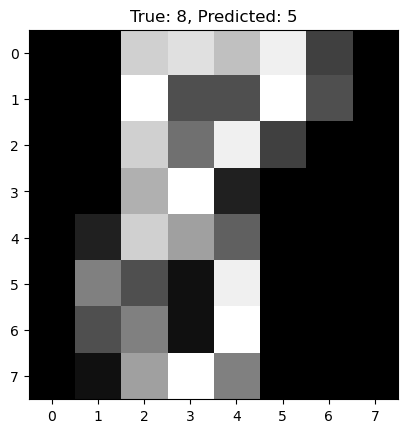

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy score
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize misclassified digits
misclassified_indexes = np.where(y_pred_classes != y_true)[0]
for i in range(5):  # Show 5 misclassified examples
    index = misclassified_indexes[i]
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_true[index]}, Predicted: {y_pred_classes[index]}")
    plt.show()


The model is performing quite well with an accuracy of 97.22%.

About the Classification Report:


Precision: The proportion of positive predictions that were correct. For example, for digit 0, 100% of the time when the model predicted 0, it was correct.


Recall: The proportion of actual positives that were correctly predicted. For example, for digit 0, the model correctly predicted 100% of the actual 0s.


F1-score: The harmonic mean of precision and recall. It's a good metric to balance the two. A high F1-score means the model is performing well on both precision and recall.


Highlights:
- The model does excellently with precision and recall close to 1 for digits like 0, 1, 2, and 4.
- For digit 8, the model performs slightly worse in terms of precision (0.91), which suggests it might sometimes confuse 8 with other digits, but still maintains a high overall recall (0.97).


Overall, the model is robust and performs well on a wide range of digits, with a balanced F1-score across classes.

In [23]:

from collections import Counter
# 1. identify classification errors
misclassified_indexes = np.where(y_pred != y_test)[0]
print(f"Total misclassified samples: {len(misclassified_indexes)}")

# 2. Count errors by class
misclassified_labels = y_test[misclassified_indexes]
misclassified_labels = misclassified_labels.flatten()  
misclassified_labels = misclassified_labels.tolist()  
error_counts = Counter(misclassified_labels)

print("\nNumber of misclassifications per class:")
for label, count in error_counts.items():
    print(f"Digit {label}: {count} errors")

Total misclassified samples: 3600

Number of misclassifications per class:
Digit 0.0: 32400 errors
Digit 1.0: 3600 errors


That's not normal.

We have to decode the target variable in order to analyse better the errors.

In [24]:

misclassified_indexes = np.array(misclassified_indexes)  
misclassified_labels = np.array(y_test)[misclassified_indexes] 
misclassified_labels_scalar = np.argmax(misclassified_labels, axis=1)


In [25]:

error_counts = Counter(misclassified_labels_scalar)

print("\nNumber of misclassifications per class:")
for label, count in error_counts.items():
    print(f"Digit {label}: {count} errors")



Number of misclassifications per class:
Digit 6: 350 errors
Digit 9: 400 errors
Digit 3: 340 errors
Digit 7: 340 errors
Digit 2: 330 errors
Digit 1: 280 errors
Digit 5: 470 errors
Digit 4: 460 errors
Digit 0: 330 errors
Digit 8: 300 errors


🔍 Analysis of results:
Digit 5 has the highest number of errors with 470 misclassified cases.

Digit 1 has the lowest number of errors with 280 cases.

Digits 6, 9, 3, and 7 also seem difficult to classify correctly.


And if we adjust the learning rate ?

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2830 - loss: 2.4128 - val_accuracy: 0.6361 - val_loss: 1.3400 - learning_rate: 0.1000
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 1.4428 - val_accuracy: 0.5667 - val_loss: 1.8507 - learning_rate: 0.1000
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5104 - loss: 1.4206 - val_accuracy: 0.7278 - val_loss: 0.7449 - learning_rate: 0.1000
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5718 - loss: 1.2596 - val_accuracy: 0.6750 - val_loss: 0.9753 - learning_rate: 0.1000
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5918 - loss: 1.2053 - val_accuracy: 0.8500 - val_loss: 0.4421 - learning_rate: 0.1000
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6498 - loss: 1.0258 - val_accuracy: 0.8583 - val_loss: 0.4962 - learning_rate: 0.1000
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6010 - loss: 1.1980 - val_accuracy: 

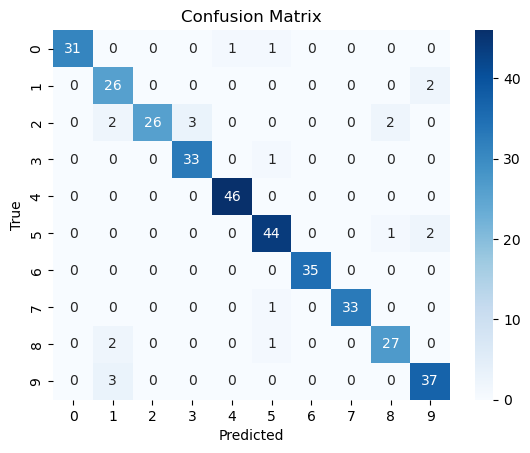

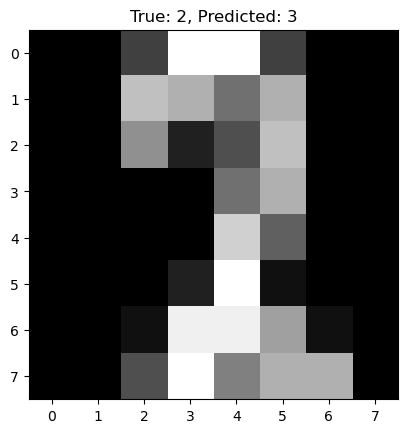

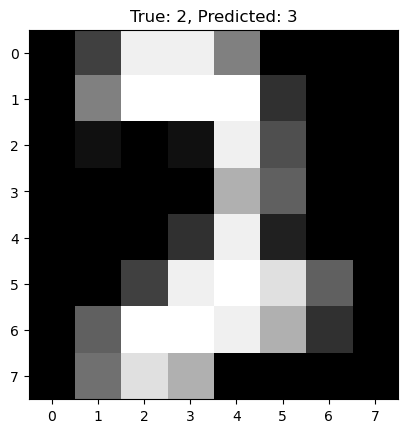

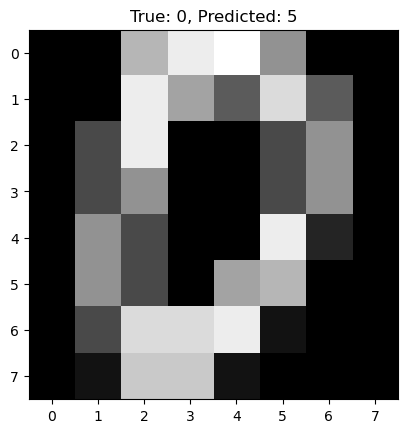

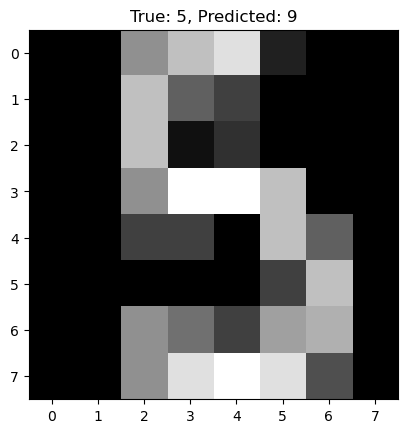

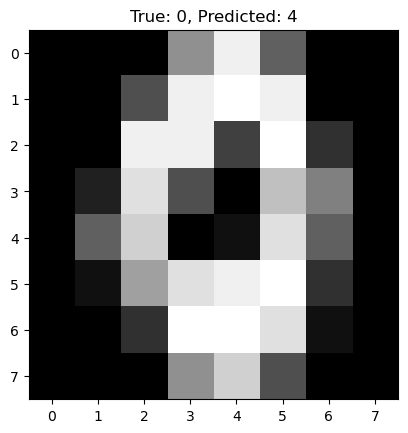

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

# Load the MNIST-like digits dataset
digits = load_digits()

# Define features (X) and target labels (y)
X_d, y_d = digits.data, digits.target

# Normalize the feature values (pixels) to be between 0 and 1
X_d = X_d / 16.0  # Since pixel values range from 0 to 16

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_d, y_d, test_size=0.2, random_state=42
)

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define neural network parameters
input_size = 64                 # 64 pixels for each digit (8x8 image)
hidden_size1 = 128              # First hidden layer with 128 neurons
hidden_size2 = 64               # Second hidden layer with 64 neurons
output_size = 10                # 10 output neurons (digits 0-9)

# Hyperparameters
dropout_rate = 0.5              # Drop 50% of neurons during training
batch_size = 32                 # Mini-batch size
epsilon = 1e-5                  # Small value for numerical stability in batch norm

# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(hidden_size1, input_dim=input_size, activation='relu'))
model.add(Dropout(dropout_rate))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(hidden_size2, activation='relu'))
model.add(Dropout(dropout_rate))  # Dropout regularization
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(output_size, activation='softmax'))  # Softmax for multi-class classification

# Define learning rate decay function
def lr_decay(epoch, initial_lr=0.1, decay_rate=0.96, decay_step=10):
    return initial_lr * (decay_rate ** (epoch // decay_step))

# Use SGD optimizer with momentum
optimizer = SGD(learning_rate=0.1, momentum=0.9)

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.1), 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate decay callback
lr_scheduler = LearningRateScheduler(lr_decay)

# Train the model with mini-batch training (batch_size=32)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, lr_scheduler])

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%")

# Calculate accuracy metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize misclassified digits
misclassified_indexes = np.where(y_pred != y_true)[0]
for i in range(5):
    index = misclassified_indexes[i]
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_true[index]}, Predicted: {y_pred[index]}")
    plt.show()


The accuracy decrease !! Except this fact, we will have almost the same result or worse.